##  Imports

In [33]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Bitcoin market value for last 30 days, vs. USD, deliver a DF and a Plot

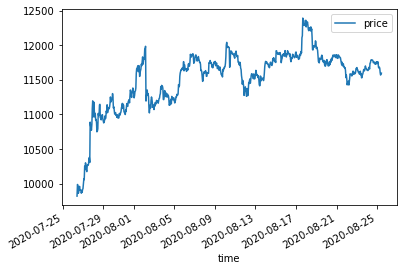

In [48]:
url1 = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=30'

response = requests.get(url1)
j_bc = response.json()

df = pd.DataFrame(j_bc['prices'], columns = ['time', 'price'])

df['time'] = pd.to_datetime(df['time'], unit = 'ms')

df.set_index('time', inplace = True )

df.plot()

In [49]:
df.head()

,price
time,
2020-07-26 10:01:02.129,9819.109104
2020-07-26 11:08:15.243,9987.357043
2020-07-26 12:08:25.901,9964.040808
2020-07-26 13:08:10.490,9859.954625
2020-07-26 14:07:02.810,9883.111241


# Litecoin market value for last 30 days, vs. USD, deliver a DF and a Plot

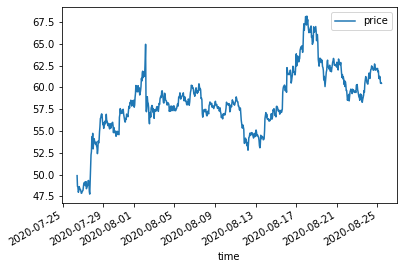

In [28]:
url2 = 'https://api.coingecko.com/api/v3/coins/litecoin/market_chart?vs_currency=usd&days=30'

response = requests.get(url2)
j_lc = response.json()

df2 = pd.DataFrame(j_lc['prices'], columns = ['time', 'price'])
df2['time'] = pd.to_datetime(df2['time'], unit = 'ms' )
df2.set_index('time', inplace = True)
df2.plot()

In [29]:
df2.head()

,price
time,
2020-07-26 10:08:19.469,49.871208
2020-07-26 11:03:16.857,48.649353
2020-07-26 12:00:12.434,48.561413
2020-07-26 13:09:06.133,47.964552
2020-07-26 14:07:57.865,48.176288


## Plot Litecoin and Dogecoin prices in USD in a lineplot for each for the last 30 days

In [60]:
df3 = pd.concat([df, df2], axis = 1)

df3.head()

,price,price
time,,
2020-07-26 10:01:02.129,9819.109104,NaN
2020-07-26 10:08:19.469,NaN,49.871208
2020-07-26 11:03:16.857,NaN,48.649353
2020-07-26 11:08:15.243,9987.357043,NaN
2020-07-26 12:00:12.434,NaN,48.561413


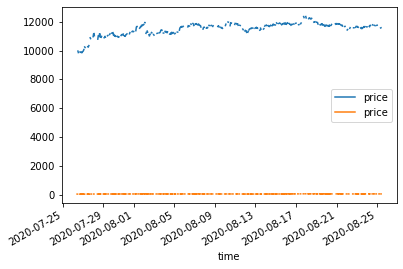

In [61]:
df3.plot()

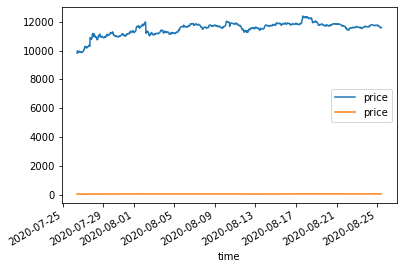

In [63]:
fig, ax1 = plt.subplots()
df.plot(ax=ax1)
df2.plot(ax=ax1)

# Top Ten Coins Report

## List the first 10 coingecko currencies in a DataFrame

In [65]:
base = 'https://api.coingecko.com/api/v3/'

url3 = base + 'coins/list'

response2 = requests.get(url3)
coins_list = response2.json()
df_clist = pd.DataFrame(coins_list)
df_clist.head(10)

,id,symbol,name
0,01coin,zoc,01coin
1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token
2,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token
3,0-5x-long-balancer-token,balhalf,0.5X Long Balancer Token
4,0-5x-long-bilibra-token,trybhalf,0.5X Long BiLira Token
5,0-5x-long-bitcoin-cash-token,bchhalf,0.5X Long Bitcoin Cash Token
6,0-5x-long-bitcoin-sv-token,bsvhalf,0.5X Long Bitcoin SV Token
7,0-5x-long-bitcoin-token,half,0.5X Long Bitcoin Token
8,0-5x-long-bitmax-token-token,btmxhalf,0.5X Long BitMax Token Token
9,0-5x-long-bnb-token,bnbhalf,0.5X Long BNB Token


## Make a csv called 'top_ten_report.csv' and check that it worked

In [66]:
df_clist = df_clist.head(10).to_csv('top_ten_report', index = False)